In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('heart-disease-cleveland.csv')

In [25]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [31]:
df.columns

Index(['age', ' sex', ' cp', ' trestbps', ' chol', ' fbs', ' restecg',
       ' thalach', ' exang', ' oldpeak', ' slope', ' ca', ' thal',
       ' diagnosis'],
      dtype='object')

In [37]:
cols_with_missing = [' ca', ' thal']
df[cols_with_missing] = df[cols_with_missing].replace([0, 0.0, "0", "0.0"], np.nan)

In [39]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,NaN,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,NaN,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,NaN,3.0,0


In [47]:
df = df.replace("?", np.nan)

In [49]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1    sex        303 non-null    int64  
 2    cp         303 non-null    int64  
 3    trestbps   303 non-null    int64  
 4    chol       303 non-null    int64  
 5    fbs        303 non-null    int64  
 6    restecg    303 non-null    int64  
 7    thalach    303 non-null    int64  
 8    exang      303 non-null    int64  
 9    oldpeak    303 non-null    float64
 10   slope      303 non-null    int64  
 11   ca         123 non-null    object 
 12   thal       301 non-null    object 
 13   diagnosis  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [53]:
df.isna().sum()

age             0
 sex            0
 cp             0
 trestbps       0
 chol           0
 fbs            0
 restecg        0
 thalach        0
 exang          0
 oldpeak        0
 slope          0
 ca           180
 thal           2
 diagnosis      0
dtype: int64

In [55]:
for col in df.columns:
    mode_val = df[col].mode()[0] 
    print(f"{col}: {mode_val}")

age: 58
 sex: 1
 cp: 4
 trestbps: 120
 chol: 197
 fbs: 0
 restecg: 0
 thalach: 162
 exang: 0
 oldpeak: 0.0
 slope: 1
 ca: 1.0
 thal: 3.0
 diagnosis: 0


In [57]:
cols_with_missing = [' ca', ' thal']
for col in cols_with_missing:
    mode_val = df[col].mode()[0] 
    df[col] = df[col].replace(np.nan, mode_val)

In [59]:
df.isna().sum()

age           0
 sex          0
 cp           0
 trestbps     0
 chol         0
 fbs          0
 restecg      0
 thalach      0
 exang        0
 oldpeak      0
 slope        0
 ca           0
 thal         0
 diagnosis    0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1    sex        303 non-null    int64  
 2    cp         303 non-null    int64  
 3    trestbps   303 non-null    int64  
 4    chol       303 non-null    int64  
 5    fbs        303 non-null    int64  
 6    restecg    303 non-null    int64  
 7    thalach    303 non-null    int64  
 8    exang      303 non-null    int64  
 9    oldpeak    303 non-null    float64
 10   slope      303 non-null    int64  
 11   ca         303 non-null    object 
 12   thal       303 non-null    object 
 13   diagnosis  303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [63]:
df[' ca'] = pd.to_numeric(df[' ca'], errors="coerce")
df[' thal'] = pd.to_numeric(df[' thal'], errors="coerce")

In [67]:
df.dtypes

age             int64
 sex            int64
 cp             int64
 trestbps       int64
 chol           int64
 fbs            int64
 restecg        int64
 thalach        int64
 exang          int64
 oldpeak      float64
 slope          int64
 ca           float64
 thal         float64
 diagnosis      int64
dtype: object

In [69]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,1.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,1.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,1.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


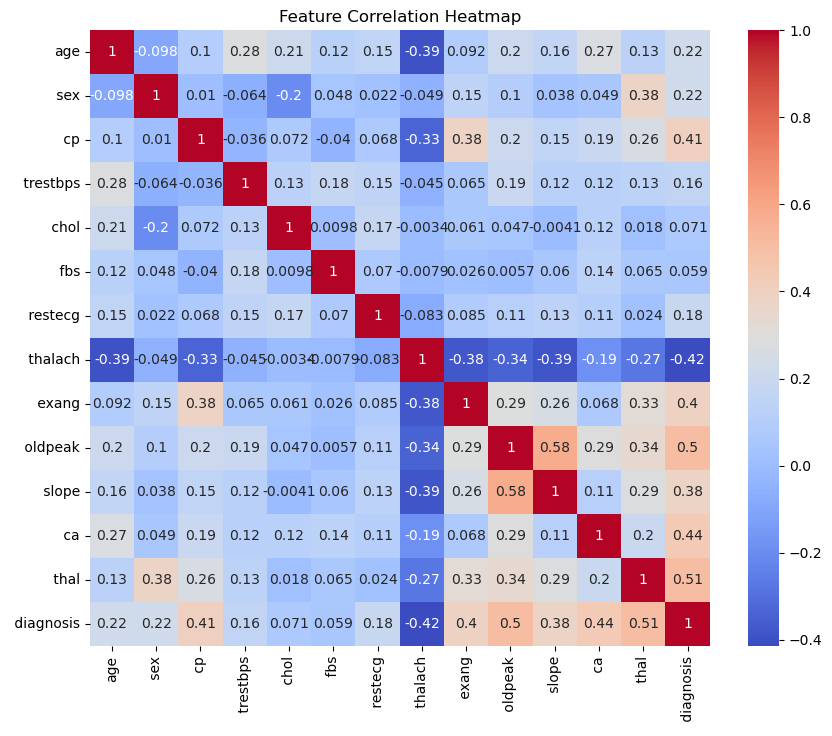

In [71]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

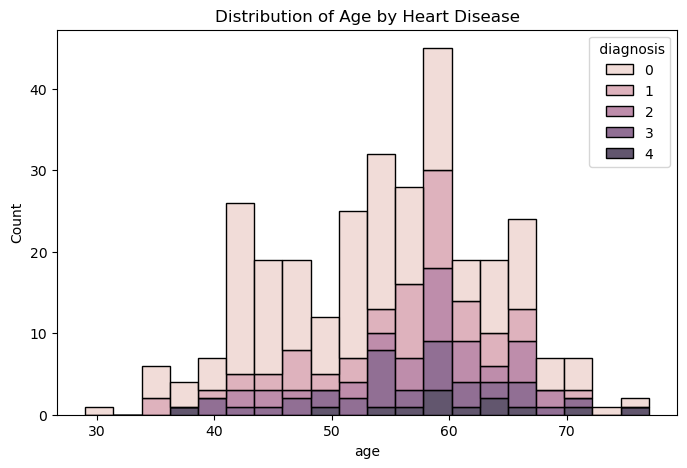

In [73]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="age", hue=" diagnosis", multiple="stack", bins=20)
plt.title("Distribution of Age by Heart Disease")
plt.show()


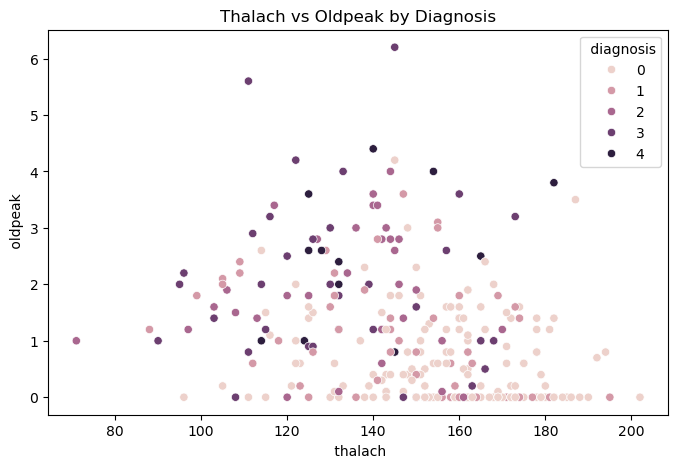

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x=" thalach", y=" oldpeak", hue=" diagnosis")
plt.title("Thalach vs Oldpeak by Diagnosis")
plt.show()


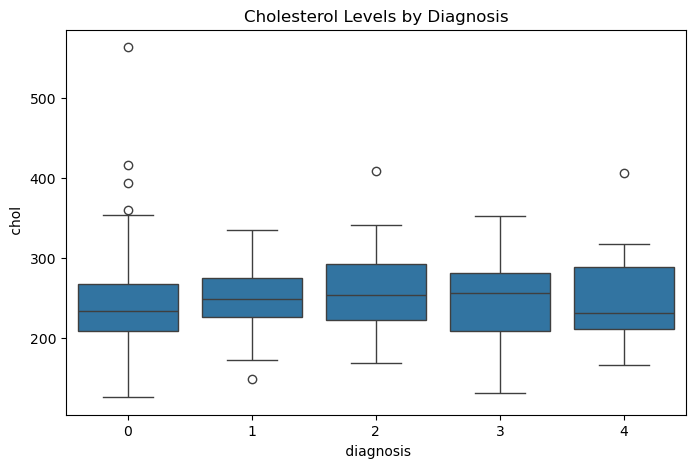

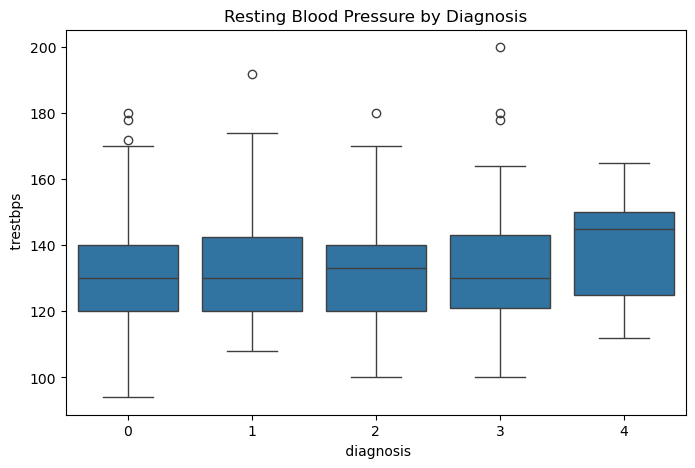

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=" diagnosis", y=" chol")
plt.title("Cholesterol Levels by Diagnosis")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=" diagnosis", y=" trestbps")
plt.title("Resting Blood Pressure by Diagnosis")
plt.show()


In [79]:
def detect_outliers(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Extract outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Column: {column}")
    print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
    print(f"Lower Bound = {lower_bound}, Upper Bound = {upper_bound}")
    print(f"Number of outliers = {len(outliers)}")
    return outliers

# Examples on columns
out_chol = detect_outliers(df, " chol")
out_trestbps = detect_outliers(df, " trestbps")


Column:  chol
Q1 = 211.0, Q3 = 275.0, IQR = 64.0
Lower Bound = 115.0, Upper Bound = 371.0
Number of outliers = 5
Column:  trestbps
Q1 = 120.0, Q3 = 140.0, IQR = 20.0
Lower Bound = 90.0, Upper Bound = 170.0
Number of outliers = 9


In [81]:
def cap_outliers(df, column):
    # Calculate Q1 and Q3
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                   np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

# Apply to columns
df = cap_outliers(df, " chol")
df = cap_outliers(df, " trestbps")


In [83]:
# after process outlayers
out_chol = detect_outliers(df, " chol")
out_trestbps = detect_outliers(df, " trestbps")

Column:  chol
Q1 = 211.0, Q3 = 275.0, IQR = 64.0
Lower Bound = 115.0, Upper Bound = 371.0
Number of outliers = 0
Column:  trestbps
Q1 = 120.0, Q3 = 140.0, IQR = 20.0
Lower Bound = 90.0, Upper Bound = 170.0
Number of outliers = 0


In [85]:
df["target"] = df[" diagnosis"].apply(lambda x: 1 if x > 0 else 0)
print(df[[" diagnosis", "target"]].head(10))


    diagnosis  target
0           0       0
1           2       1
2           1       1
3           0       0
4           0       0
5           0       0
6           3       1
7           0       0
8           2       1
9           1       1


In [87]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis,target
0,63,1,1,145.0,233.0,1,2,150,0,2.3,3,1.0,6.0,0,0
1,67,1,4,160.0,286.0,0,2,108,1,1.5,2,3.0,3.0,2,1
2,67,1,4,120.0,229.0,0,2,129,1,2.6,2,2.0,7.0,1,1
3,37,1,3,130.0,250.0,0,0,187,0,3.5,3,1.0,3.0,0,0
4,41,0,2,130.0,204.0,0,2,172,0,1.4,1,1.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110.0,264.0,0,0,132,0,1.2,2,1.0,7.0,1,1
299,68,1,4,144.0,193.0,1,0,141,0,3.4,2,2.0,7.0,2,1
300,57,1,4,130.0,131.0,0,0,115,1,1.2,2,1.0,7.0,3,1
301,57,0,2,130.0,236.0,0,2,174,0,0.0,2,1.0,3.0,1,1


In [89]:
df.to_csv("heart_disease.csv", index=False)